In [216]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import pickle as pk 
import joblib as jb
import warnings
warnings.filterwarnings("ignore")

In [217]:
df = pd.read_csv("Height-Width.csv")

Data Analysis

In [218]:
df.head()

,Height,Width
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [219]:
df.tail()

,Height,Width
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [220]:
df[5:11]

,Height,Width
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676
10,71.195382,186.604926


In [221]:
df['Height'].head(7)

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
5    67.253016
6    68.785081
Name: Height, dtype: float64

In [222]:
df.mean()

Height     69.024411
Width     186.891258
dtype: float64

In [223]:
df.Width.mean()

186.891257979463

In [224]:
df.describe()

,Height,Width
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [225]:
df.Width.std()

19.903131631122328

In [226]:
df.shape

(3501, 2)

In [227]:
row,col=df.shape

In [228]:
row

3501

In [229]:
col

2

In [230]:
df.isnull()

,Height,Width
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
3496,False,False
3497,False,False
3498,False,False
3499,False,False


In [231]:
df.isnull().sum()

Height    0
Width     0
dtype: int64

Text(0.5, 1.0, 'Height Plot')

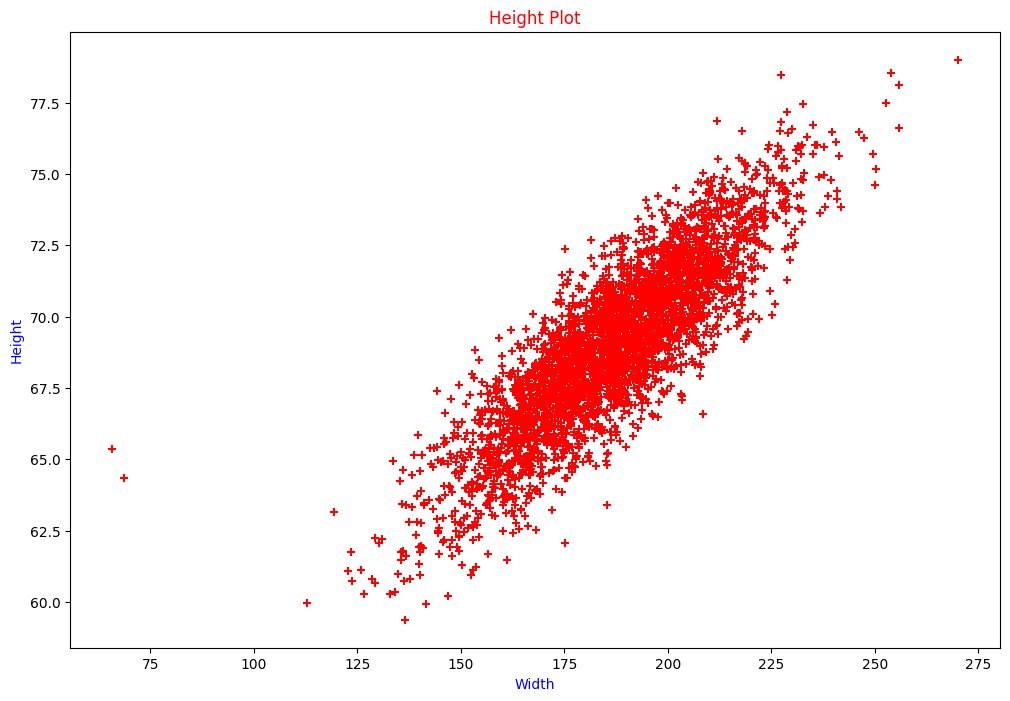

In [232]:
plt.figure(figsize=(12,8))
plt.scatter(df.Width, df.Height, marker="+", color="red")
plt.xlabel("Width", color="blue")
plt.ylabel("Height",color="blue")
plt.title("Height Plot", color="red")

In [233]:
x= df[['Width']]
x.head()

,Width
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [234]:
y=df['Height']
y.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [235]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=100)

In [236]:
xtrain.head()

,Width
3294,171.524042
43,161.193433
54,169.737707
2849,158.715870
3336,200.842247


In [237]:
xtest.head()

,Width
2337,192.466355
1983,182.802806
3053,191.497899
576,169.326284
1361,194.073975


In [238]:
ytrain.head()

3294    66.733634
43      66.090177
54      66.990944
2849    66.778724
3336    70.406172
Name: Height, dtype: float64

In [239]:
ytest.head()

2337    69.576572
1983    70.465663
3053    69.777875
576     66.045444
1361    70.878633
Name: Height, dtype: float64

Linear Regression

In [240]:
reg=LinearRegression()

In [241]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [242]:
m=reg.coef_
m

array([0.12467403])

In [243]:
c=reg.intercept_
c

45.72454893886103

In [244]:
y=m*71.19538 + c
y

array([54.60076412])

In [245]:
reg.predict([[71.19538]])

array([54.60076412])

In [246]:
reg.predict(xtest)

array([69.72010578, 68.51531208, 69.59936435, ..., 70.37600882,
       72.59860519, 62.66705783])

In [247]:
pred = reg.predict(xtest)
pred

array([69.72010578, 68.51531208, 69.59936435, ..., 70.37600882,
       72.59860519, 62.66705783])

In [248]:
df["Predicted Result"] = reg.predict(x)

In [249]:
df.head()

,Height,Width,Predicted Result
0,73.847017,241.893563,75.882395
1,68.781904,162.310473,65.960450
2,74.110105,212.740856,72.247809
3,71.730978,220.042470,73.158131
4,69.881796,206.349801,71.451011


In [250]:
mse = mean_squared_error(ytest,pred)
mse

2.3671550444170233

In [251]:
mae = mean_absolute_error(ytest,pred)
mae

1.1903576542058731

Best Fit Line

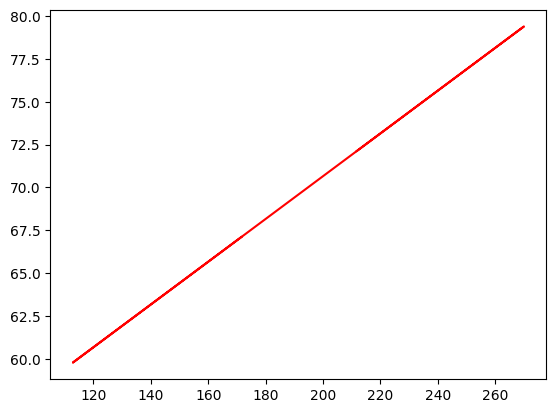

In [252]:
plt.plot(xtrain,reg.predict(xtrain),color="red")

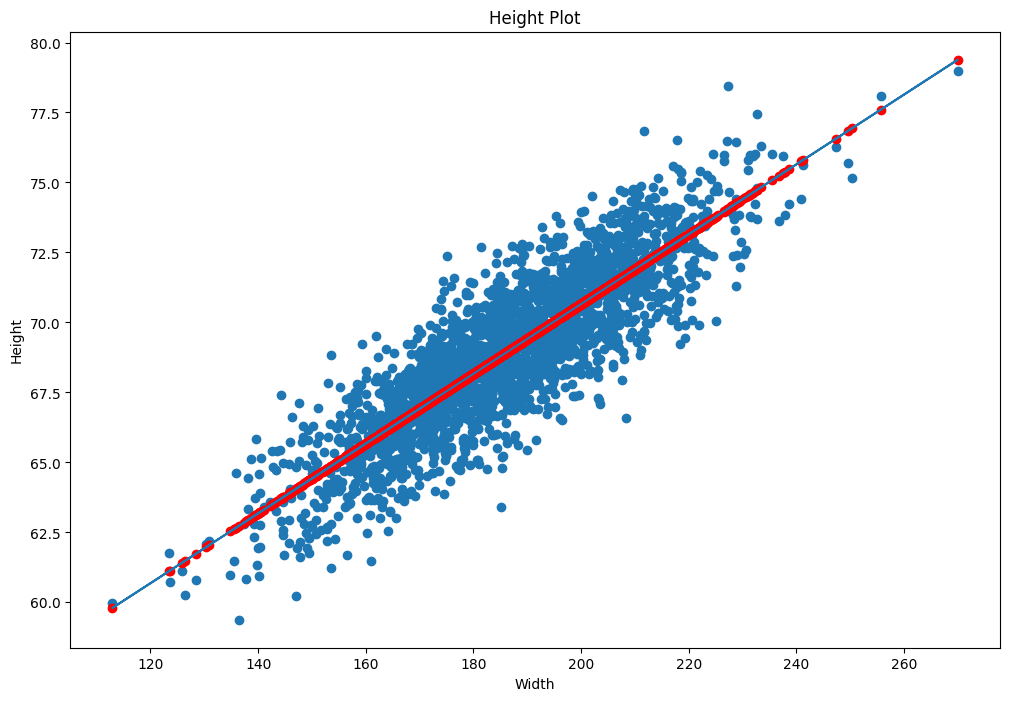

In [253]:
plt.figure(figsize=(12,8))
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Height Plot")
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,reg.predict(xtrain))
plt.scatter(xtrain,reg.predict(xtrain),color="red")

In [254]:
r2_score(ytest,pred)

0.7249237432721577

In [255]:
xtest.to_csv("xtest.csv")

In [256]:
ytest.to_csv("ytest.csv")

In [257]:
xtest.head()

,Width
2337,192.466355
1983,182.802806
3053,191.497899
576,169.326284
1361,194.073975


In [258]:
ytest.head()

2337    69.576572
1983    70.465663
3053    69.777875
576     66.045444
1361    70.878633
Name: Height, dtype: float64

In [259]:
len(xtest)

1051

Save Model

In [260]:
pk.dump(reg,open("why so serious","wb"))

In [261]:
reg2 = pk.load(open("why so serious","rb"))

In [262]:
reg2.predict([[73.84701]])

array([54.93135353])

In [263]:
jb.dump(reg, "second")

['second']